## Principal Component Analysis (PCA) for Image Compression and Eigenvectors

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

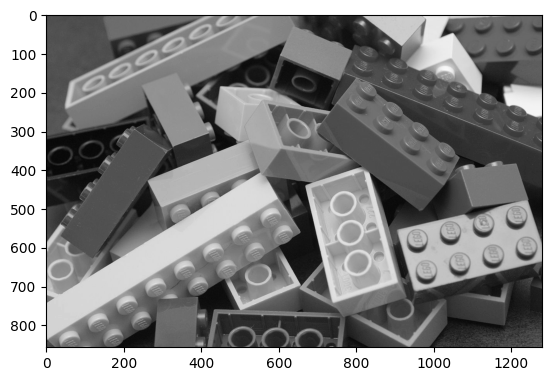

In [2]:
# https://www.lego.com/cdn/cs/sustainability/assets/blt642f22a3fb72fccc/Supplier_page_pileofbricks.jpg?disable=upscale&width=720&quality=50&crop=1:1
# https://en.wikipedia.org/wiki/File:Lego_Color_Bricks.jpg
img = Image.open('1280px-Lego_Color_Bricks.jpg')
data = img.convert('L')

plt.imshow(data, cmap='gray')

In [3]:
data = np.array(data)

data.shape

(857, 1280)

In [4]:
data = data[:850, :]

data.shape

(850, 1280)

In [5]:
def split_array(d, w, h):
    height, width = d.shape[0] // h * h, d.shape[1] // w * w
    
    return np.array([d[i:i+w, j:j+h].flatten() for i in range(0, height, h) for j in range(0, width, w)])

In [6]:
def stack_array(d, w, h, width):
    c = [np.hstack([a.reshape((w,h)) for a in d[i:i+width]]) for i in range(0, d.shape[0], width)]
    return np.vstack(c)

In [7]:
def compress(d, split_w, split_h, compress_w, compress_h):
    d1 = split_array(d, split_w, split_h)
    
    means = np.mean(d1, axis=1).reshape(-1, 1)
    stds = np.std(d1, axis=1).reshape(-1, 1)
    stds[stds == 0] = 0.0001
    
    # d1 = (d1 - means) / stds
    
    pca = PCA(n_components=compress_w*compress_h)
    d_pca = pca.fit_transform(d1)
    
    d2 = pca.inverse_transform(d_pca)
    # d2 = (d2 * stds + means).astype('uint8')
    
    d3 = stack_array(d2, split_w, split_h, d.shape[1] // split_w)
    
    return d3, pca

In [8]:
def plot_eigenvalues(n_row, n_col, pca, w, h):
    # plot eigenvalues
    plt.figure(figsize=(13, 12))
    for i in range(n_row * n_col):
        offset = 0
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(pca.components_[i].reshape(w, h), cmap='gray')
        title_text = f'Eigenvalue[{i}]'
        plt.title(title_text, size=6.5)
        plt.xticks(())
        plt.yticks(())

    plt.show()

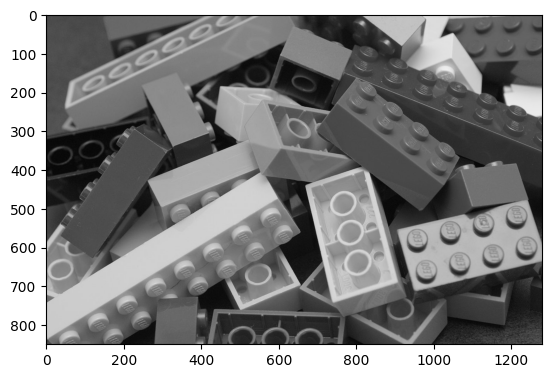

In [9]:
d, model_100 = compress(data, 10, 10, 10, 10)
img_d = Image.fromarray(d)
plt.imshow(img_d, cmap='gray')

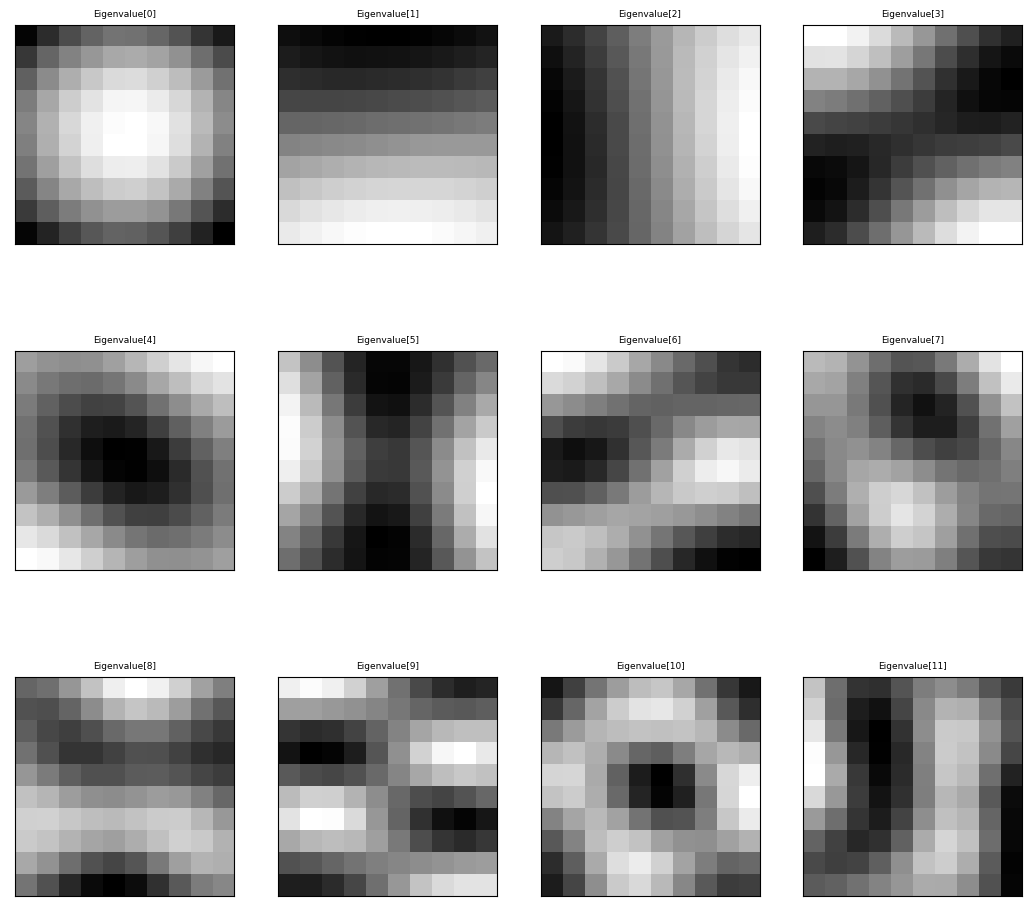

In [10]:
plot_eigenvalues(3, 4, model_100, 10, 10)

In [11]:
np.sum(model_100.explained_variance_ratio_[:2])

0.9531883098582244

Text(0, 0.5, 'Explained variance')

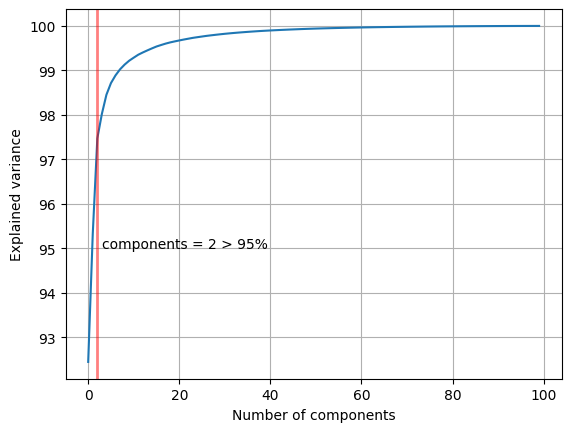

In [12]:
# choose the right number of dimensions
plt.grid()

plt.plot(np.cumsum(model_100.explained_variance_ratio_ * 100))

plt.axvline(2, linewidth=2, color='r', alpha=0.5)
plt.gca().text(3, 95, 'components = 2 > 95%')

plt.xlabel('Number of components')
plt.ylabel('Explained variance')
# plt.savefig('Scree plot.png')

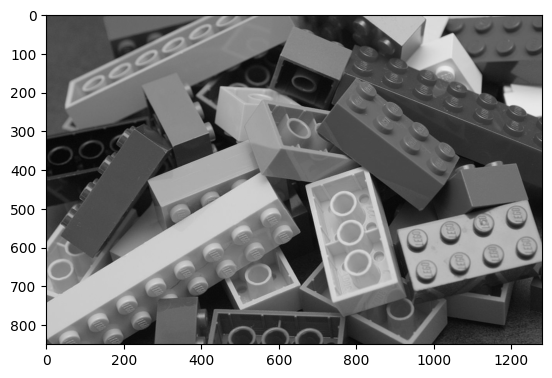

In [13]:
d, model_5x5 = compress(data, 10, 10, 5, 5)
img_d = Image.fromarray(d)
plt.imshow(img_d, cmap='gray')

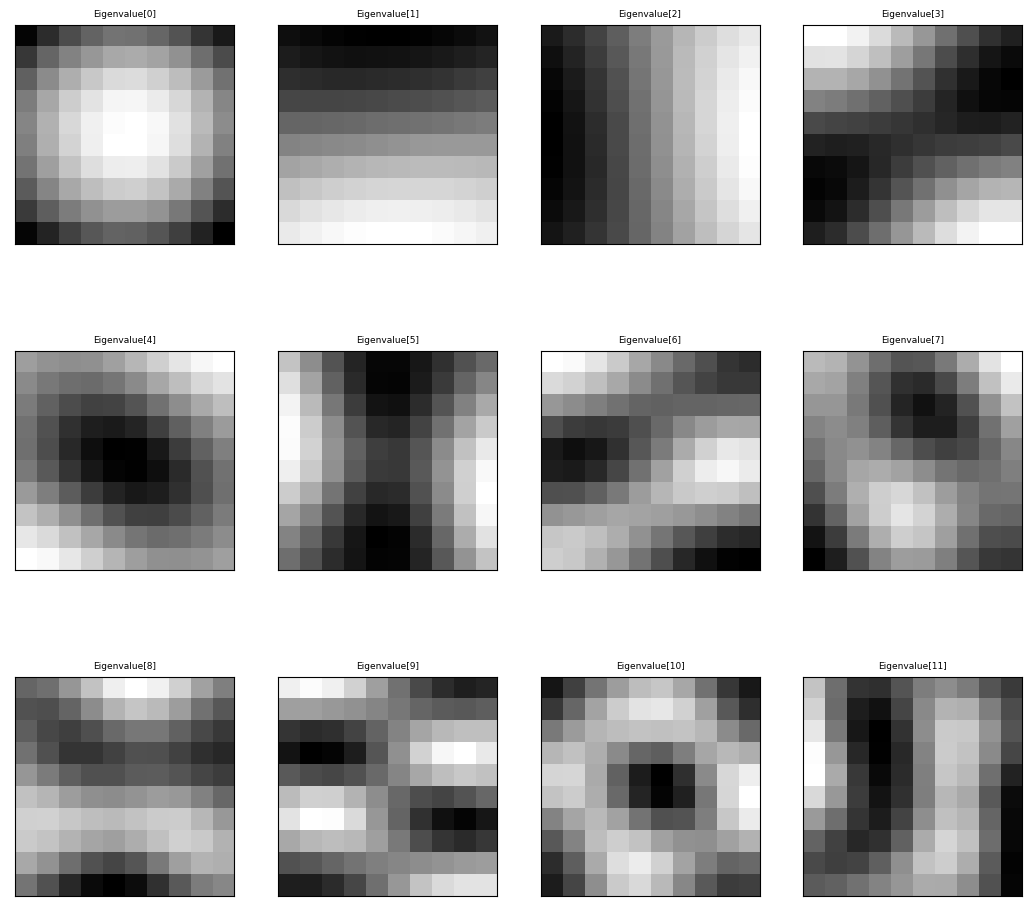

In [14]:
plot_eigenvalues(3, 4, model_5x5, 10, 10)

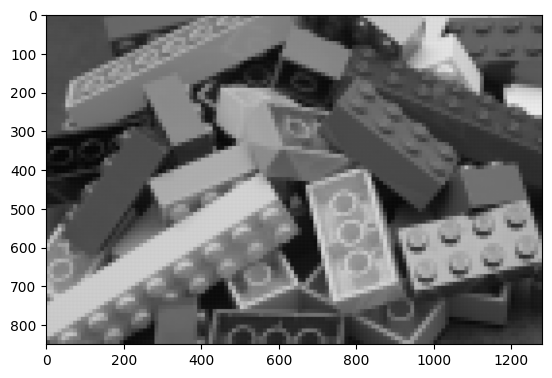

In [15]:
d, model_1x1 = compress(data, 10, 10, 1, 1)
img_d = Image.fromarray(d)
plt.imshow(img_d, cmap='gray')

In [16]:
# parse components = 2
d = split_array(data, 10, 10)

pca = PCA(n_components=2)
d_pca = pca.fit_transform(d)

d_pca.shape

(10880, 2)

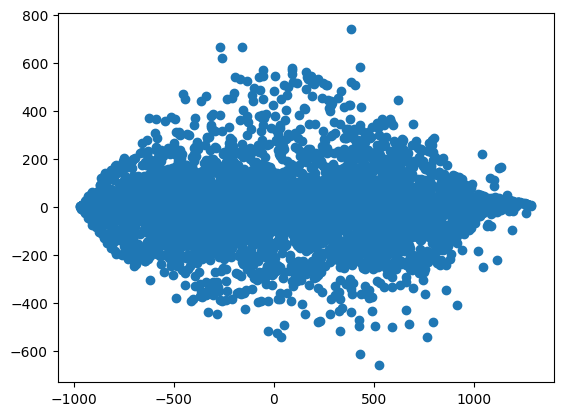

In [17]:
plt.scatter(d_pca[:, 0], d_pca[:, 1])

In [18]:
import pandas as pd
import seaborn as sns

In [19]:
d.shape

(10880, 100)

In [20]:
# parse components
k = 4

d = split_array(data, 2, 2)

pca = PCA(n_components=k)
d_pca = pca.fit_transform(d)

d_pca.shape

(272000, 4)

Text(0.5, 0.98, 'Pair plot of PCA (components=4)')

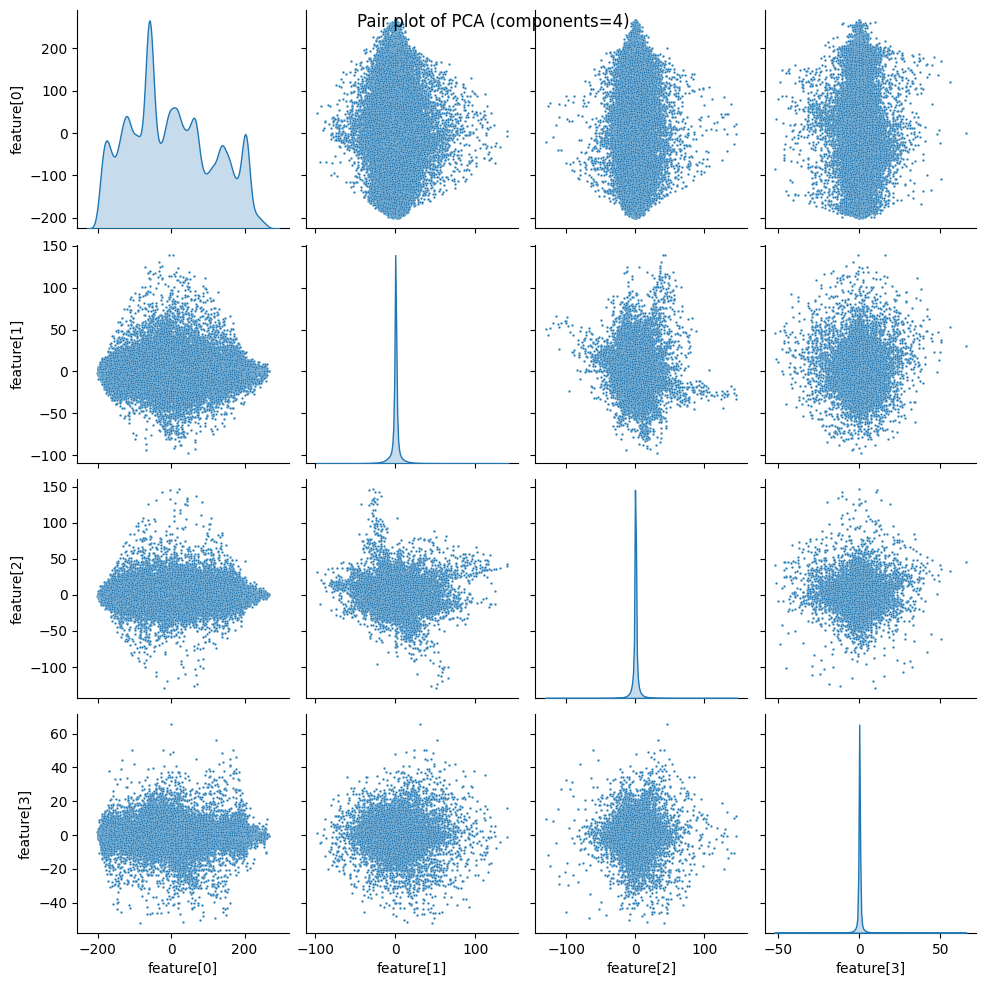

In [22]:
nums = np.array(range(data.shape[0]))

features = np.random.choice(nums, 2000)

data_title = [f'feature[{i}]' for i in range(k)]

a = sns.pairplot(pd.DataFrame(d_pca, columns=data_title), diag_kind='kde', plot_kws={'s': 3})
a.fig.suptitle(f'Pair plot of PCA (components={k})')

Text(0.5, 0.98, 'Pair plot of Image original features')

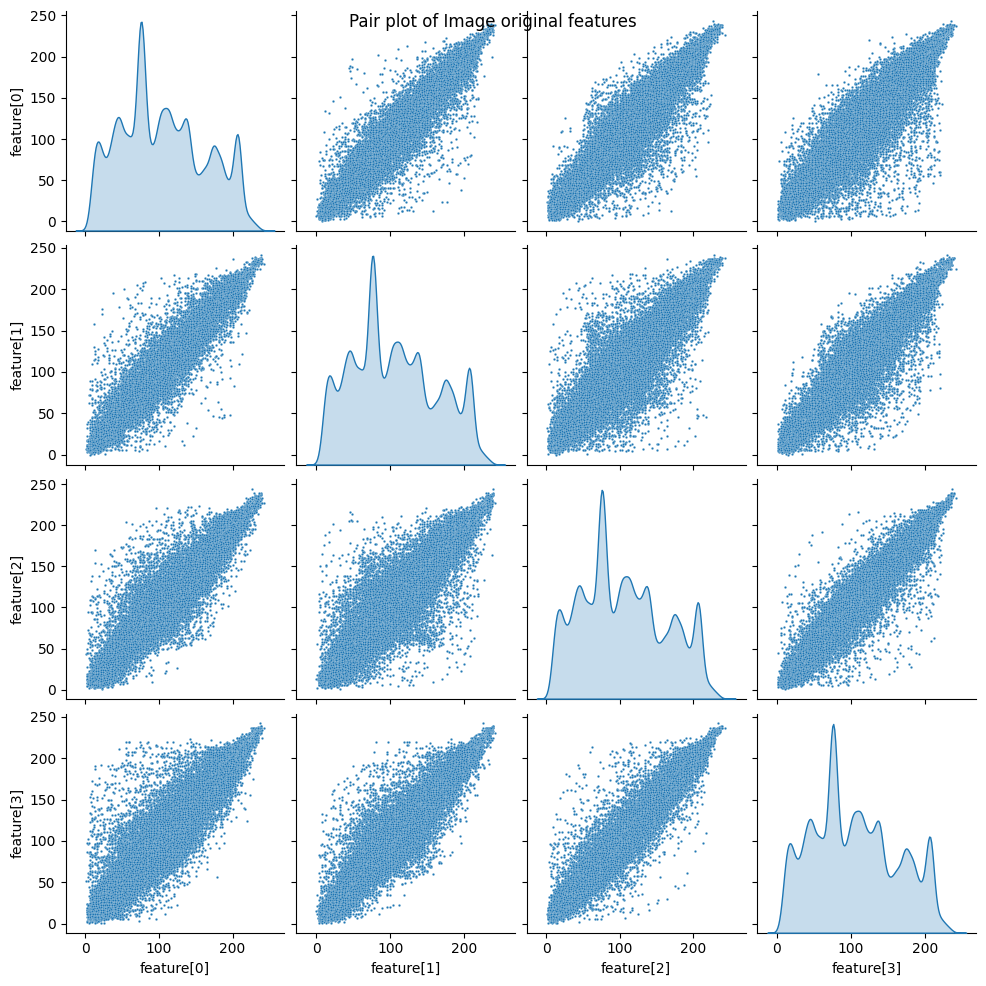

In [23]:
b = sns.pairplot(pd.DataFrame(d, columns=data_title), diag_kind='kde', plot_kws={'s': 3})
b.fig.suptitle('Pair plot of Image original features')